In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import datetime as dt
import math

In [176]:
day1 = pd.read_csv("Day1.csv")
day2 = pd.read_csv("Day2.csv")
day3 = pd.read_csv("Day3.csv")

In [177]:
day1.head()

,Unnamed: 0,Unnamed: 1,Date,Time,Date+Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,...,SpeedFL,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate
0,NaN,0,12-3-2021,00:17:22.567,12-03-2021 10:17:23,3,NaN,1,2,00:15:25.154,...,NaN,207.0,HARD,1.0,True,NaN,McLaren,RIC,1,False
1,NaN,1,12-3-2021,00:19:35.446,12-03-2021 10:19:35,3,2:12.879,2,3,00:17:49.544,...,NaN,207.0,HARD,2.0,False,00:17:22.567,McLaren,RIC,1,False
2,NaN,2,12-3-2021,00:37:22.777,12-03-2021 10:37:23,3,NaN,3,3,00:35:14.736,...,148.0,185.0,HARD,4.0,False,00:19:35.446,McLaren,RIC,1,False
3,NaN,3,12-3-2021,00:39:12.283,12-03-2021 10:39:12,3,1:49.506,4,4,NaN,...,NaN,228.0,HARD,3.0,False,00:37:22.777,McLaren,RIC,1,False
4,NaN,4,12-3-2021,00:55:56.415,12-03-2021 10:55:56,3,NaN,5,4,00:53:57.841,...,290.0,195.0,HARD,6.0,False,00:39:12.283,McLaren,RIC,1,False


In [178]:
day1 = day1.drop(["Unnamed: 0","Unnamed: 1"],axis=1)
day2 = day2.drop(["Unnamed: 0"],axis=1)
day3 = day3.drop(["Unnamed: 0"],axis=1)
day1 = day1[pd.notnull(day1['LapTime'])]
day2 = day2[pd.notnull(day2['LapTime'])]
day3= day3[pd.notnull(day3['LapTime'])]

In [179]:
day2

,Date,Time,Date+Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,SpeedFL,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate
1,13-3-2021,0:14:58.825,13-03-2021 10:14:59,3.0,2:08.764,2.0,3.0,0:13:14.535,0:14:57.149,0:55.359,...,NaN,199.0,HARD,10.0,False,0:12:50.061,McLaren,RIC,1.0,False
3,13-3-2021,0:25:34.429,13-03-2021 10:25:34,3.0,2:12.076,4.0,5.0,0:23:45.493,0:25:32.726,0:59.325,...,NaN,NaN,HARD,12.0,NaN,0:23:22.353,McLaren,RIC,1.0,False
5,13-3-2021,0:53:20.346,13-03-2021 10:53:20,3.0,2:08.584,6.0,7.0,0:51:35.888,0:53:18.653,0:57.031,...,NaN,NaN,MEDIUM,6.0,False,0:51:11.762,McLaren,RIC,1.0,False
7,13-3-2021,1:04:00.334,13-03-2021 11:04:00,3.0,2:08.003,8.0,9.0,1:02:21.236,1:03:58.655,0:58.557,...,NaN,196.0,MEDIUM,8.0,False,1:01:52.331,McLaren,RIC,1.0,False
10,13-3-2021,1:24:06.331,13-03-2021 11:24:06,3.0,1:33.689,11.0,10.0,NaN,NaN,0:29.769,...,285.0,309.0,TEST_UNKNOWN,3.0,True,1:22:32.642,McLaren,RIC,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,13-3-2021,8:54:19.060,13-03-2021 18:54:19,99.0,1:49.733,121.0,23.0,NaN,8:54:17.350,0:36.151,...,NaN,205.0,MEDIUM,8.0,False,8:52:29.327,Alfa Romeo,GIO,1.0,False
1235,13-3-2021,8:56:45.015,13-03-2021 18:56:45,99.0,2:25.955,122.0,24.0,8:54:39.431,8:56:43.303,1:12.137,...,NaN,200.0,MEDIUM,12.0,False,8:54:19.060,Alfa Romeo,GIO,1.0,False
1236,13-3-2021,8:59:05.389,13-03-2021 18:59:05,99.0,2:20.374,123.0,25.0,8:57:04.523,8:59:03.706,1:03.475,...,NaN,173.0,MEDIUM,13.0,NaN,8:56:45.015,Alfa Romeo,GIO,1.0,False
1237,13-3-2021,9:01:31.030,13-03-2021 19:01:31,99.0,2:25.641,124.0,26.0,8:59:24.479,9:01:29.333,1:05.115,...,NaN,188.0,MEDIUM,14.0,NaN,8:59:05.389,Alfa Romeo,GIO,1.0,False


In [180]:
Day1S = day1.loc[day1['Compound'] == 'SOFT']
Day2S = day2.loc[day2['Compound'] == 'SOFT']
Day3S = day3.loc[day3['Compound'] == 'SOFT']

Day1M = day1.loc[day1['Compound'] == 'MEDIUM']
Day2M = day2.loc[day2['Compound'] == 'MEDIUM']
Day3M = day3.loc[day3['Compound'] == 'MEDIUM']

Day1H = day1.loc[day1['Compound'] == 'HARD']
Day2H = day2.loc[day2['Compound'] == 'HARD']
Day3H = day3.loc[day3['Compound'] == 'HARD']

In [181]:
day2

,Date,Time,Date+Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,SpeedFL,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate
1,13-3-2021,0:14:58.825,13-03-2021 10:14:59,3.0,2:08.764,2.0,3.0,0:13:14.535,0:14:57.149,0:55.359,...,NaN,199.0,HARD,10.0,False,0:12:50.061,McLaren,RIC,1.0,False
3,13-3-2021,0:25:34.429,13-03-2021 10:25:34,3.0,2:12.076,4.0,5.0,0:23:45.493,0:25:32.726,0:59.325,...,NaN,NaN,HARD,12.0,NaN,0:23:22.353,McLaren,RIC,1.0,False
5,13-3-2021,0:53:20.346,13-03-2021 10:53:20,3.0,2:08.584,6.0,7.0,0:51:35.888,0:53:18.653,0:57.031,...,NaN,NaN,MEDIUM,6.0,False,0:51:11.762,McLaren,RIC,1.0,False
7,13-3-2021,1:04:00.334,13-03-2021 11:04:00,3.0,2:08.003,8.0,9.0,1:02:21.236,1:03:58.655,0:58.557,...,NaN,196.0,MEDIUM,8.0,False,1:01:52.331,McLaren,RIC,1.0,False
10,13-3-2021,1:24:06.331,13-03-2021 11:24:06,3.0,1:33.689,11.0,10.0,NaN,NaN,0:29.769,...,285.0,309.0,TEST_UNKNOWN,3.0,True,1:22:32.642,McLaren,RIC,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,13-3-2021,8:54:19.060,13-03-2021 18:54:19,99.0,1:49.733,121.0,23.0,NaN,8:54:17.350,0:36.151,...,NaN,205.0,MEDIUM,8.0,False,8:52:29.327,Alfa Romeo,GIO,1.0,False
1235,13-3-2021,8:56:45.015,13-03-2021 18:56:45,99.0,2:25.955,122.0,24.0,8:54:39.431,8:56:43.303,1:12.137,...,NaN,200.0,MEDIUM,12.0,False,8:54:19.060,Alfa Romeo,GIO,1.0,False
1236,13-3-2021,8:59:05.389,13-03-2021 18:59:05,99.0,2:20.374,123.0,25.0,8:57:04.523,8:59:03.706,1:03.475,...,NaN,173.0,MEDIUM,13.0,NaN,8:56:45.015,Alfa Romeo,GIO,1.0,False
1237,13-3-2021,9:01:31.030,13-03-2021 19:01:31,99.0,2:25.641,124.0,26.0,8:59:24.479,9:01:29.333,1:05.115,...,NaN,188.0,MEDIUM,14.0,NaN,8:59:05.389,Alfa Romeo,GIO,1.0,False


In [182]:
Day2H.loc[Day2H['Driver'] == 'BOT']['LapTime'].min()
test = Day1H[['LapTime', 'Driver']]
d1S = []
d1M = []
d1H = []
d2S = []
d2M = []
d2H = []
d3S = []
d3M = []
d3H = []
a = ['HAM','BOT','VER','PER','RIC', 'NOR', 'STR','VET','OCO','ALO','LEC','SAI','GAS','TSU','RAI','GIO','SCH','MAZ','LAT','RUS']
for n in a:
    d1S.append(Day1S[['LapTime', 'Driver']][Day1S[['LapTime', 'Driver']]['Driver']==n]['LapTime'].min())
    d1M.append(Day1M[['LapTime', 'Driver']][Day1M[['LapTime', 'Driver']]['Driver']==n]['LapTime'].min())
    d1H.append(Day1H[['LapTime', 'Driver']][Day1H[['LapTime', 'Driver']]['Driver']==n]['LapTime'].min())
    d2S.append(Day2S[['LapTime', 'Driver']][Day2S[['LapTime', 'Driver']]['Driver']==n]['LapTime'].min())
    d2M.append(Day2M[['LapTime', 'Driver']][Day2M[['LapTime', 'Driver']]['Driver']==n]['LapTime'].min())
    d2H.append(Day2H[['LapTime', 'Driver']][Day2H[['LapTime', 'Driver']]['Driver']==n]['LapTime'].min())
    d3S.append(Day3S[['LapTime', 'Driver']][Day3S[['LapTime', 'Driver']]['Driver']==n]['LapTime'].min())
    d3M.append(Day3M[['LapTime', 'Driver']][Day3M[['LapTime', 'Driver']]['Driver']==n]['LapTime'].min())
    d3H.append(Day3H[['LapTime', 'Driver']][Day3H[['LapTime', 'Driver']]['Driver']==n]['LapTime'].min())
    
for v in range(len(a)):
    if d1S[v] != d1S[v]:
        d1S[v] = 'None'
    if d2S[v] != d2S[v]:
        d2S[v] = 'None'
    if d3S[v] != d3S[v]:
        d3S[v] = 'None'
    if d1M[v] != d1M[v]:
        d1M[v] = 'None'
    if d2M[v] != d2M[v]:
        d2M[v] = 'None'
    if d3M[v] != d3M[v]:
        d3M[v] = 'None'
    if d1H[v] != d1H[v] :
        d1H[v] = 'None'
    if d2H[v] != d2H[v] :
        d2H[v] = 'None'
    if d3H[v] != d3H[v] :
        d3H[v] = 'None'
    

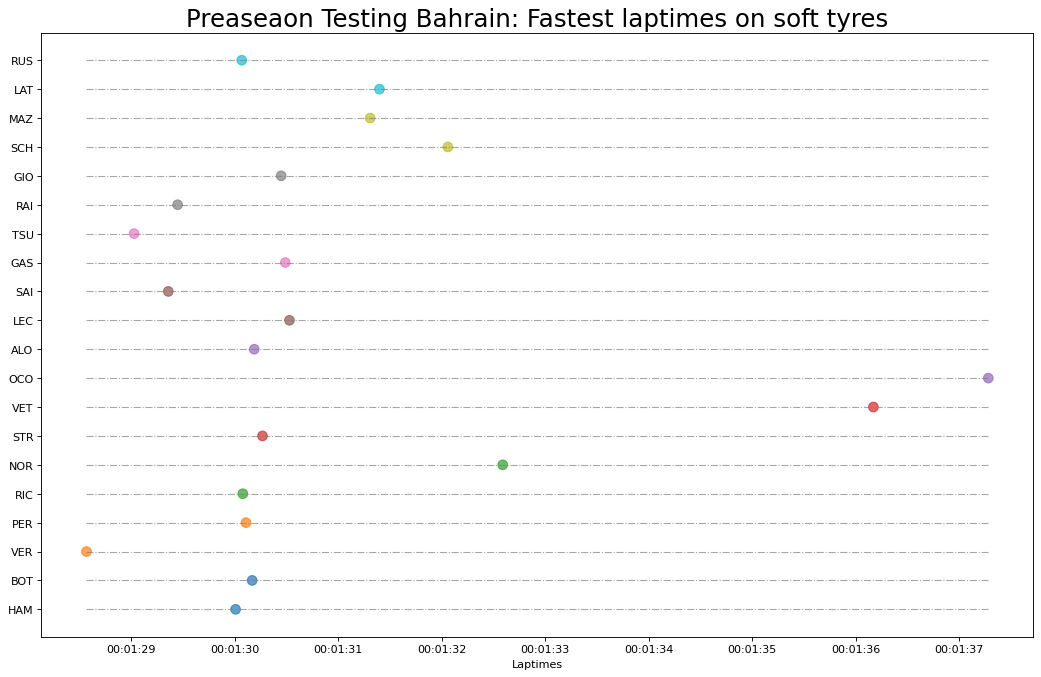

In [183]:
b = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for n in range(len(a)):
    if (d1S[n] != 'None'):
        b[n]=pd.to_datetime(d1S[n], infer_datetime_format=True).strftime('%H:%M:%S.%f')[:-6]
    if (d2S[n] != 'None' and d1S[n]>d2S[n]):
        b[n] = pd.to_datetime(d2S[n],  infer_datetime_format=True).strftime('%H:%M:%S.%f')[:-6] 
    if (d3S[n] != 'None' and (d2S[n] > d3S[n] or d1S[n] > d3S[n]) ):
        b[n] = pd.to_datetime(d3S[n],  infer_datetime_format=True).strftime('%H:%M:%S.%f')[:-6] 
    
for i in range(len(b)):
    str = b[i]
    b[i] = pd.to_datetime(str[:-4] + '.' + str[-3:-1], format = '%M:%S.%f')

color_indicies= [0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9]
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=a, xmin=b[2], xmax=b[8], color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=a, x=b, s=75, c=color_indicies,cmap='tab10', alpha=0.7)
ax.set_title('Preaseaon Testing Bahrain: Fastest laptimes on soft tyres', fontdict={'size':22})
ax.set_xlabel('Laptimes')
plt.show()

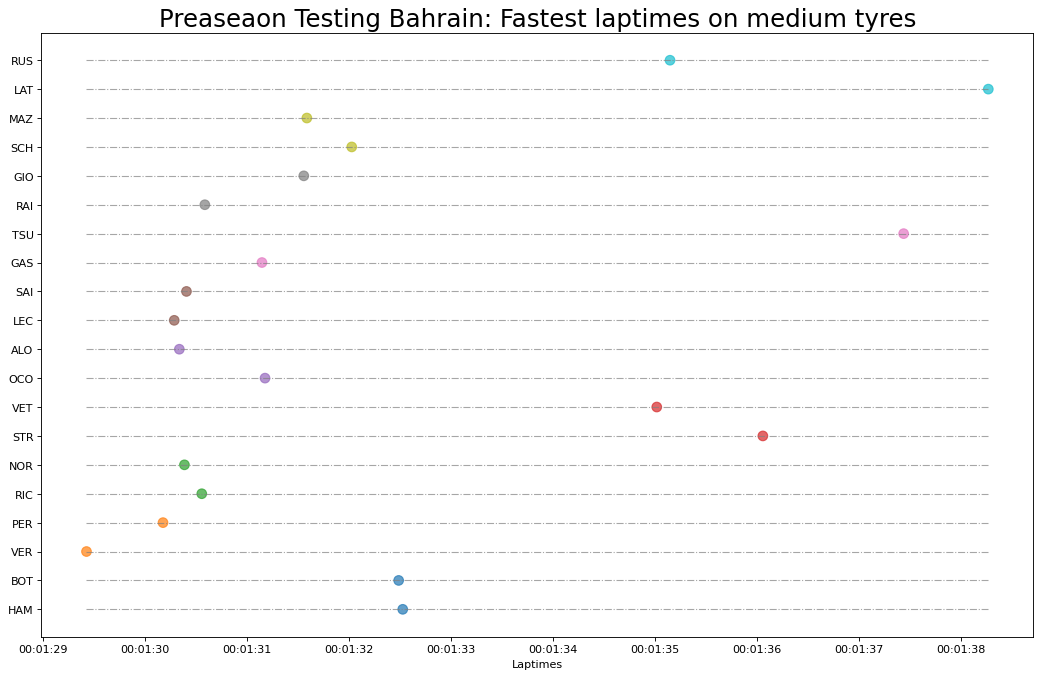

In [184]:
b = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for n in range(len(a)):
    if (d1M[n] != 'None'):
        b[n]=pd.to_datetime(d1M[n], infer_datetime_format=True).strftime('%H:%M:%S.%f')[:-6]
    if (d2M[n] != 'None' and d1M[n]>d2M[n]):
        b[n] = pd.to_datetime(d2M[n],  infer_datetime_format=True).strftime('%H:%M:%S.%f')[:-6] 
    if (d3M[n] != 'None' and (d2M[n] > d3M[n] or d1M[n] > d3M[n]) ):
        b[n] = pd.to_datetime(d3M[n],  infer_datetime_format=True).strftime('%H:%M:%S.%f')[:-6] 
    
for i in range(len(b)):
    str = b[i]
    b[i] = pd.to_datetime(str[:-4] + '.' + str[-3:-1], format = '%M:%S.%f')

color_indicies= [0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9]
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=a, xmin=b[2], xmax=b[-2], color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=a, x=b, s=75, c=color_indicies,cmap='tab10', alpha=0.7)
ax.set_title('Preaseaon Testing Bahrain: Fastest laptimes on medium tyres', fontdict={'size':22})
ax.set_xlabel('Laptimes')
plt.show()

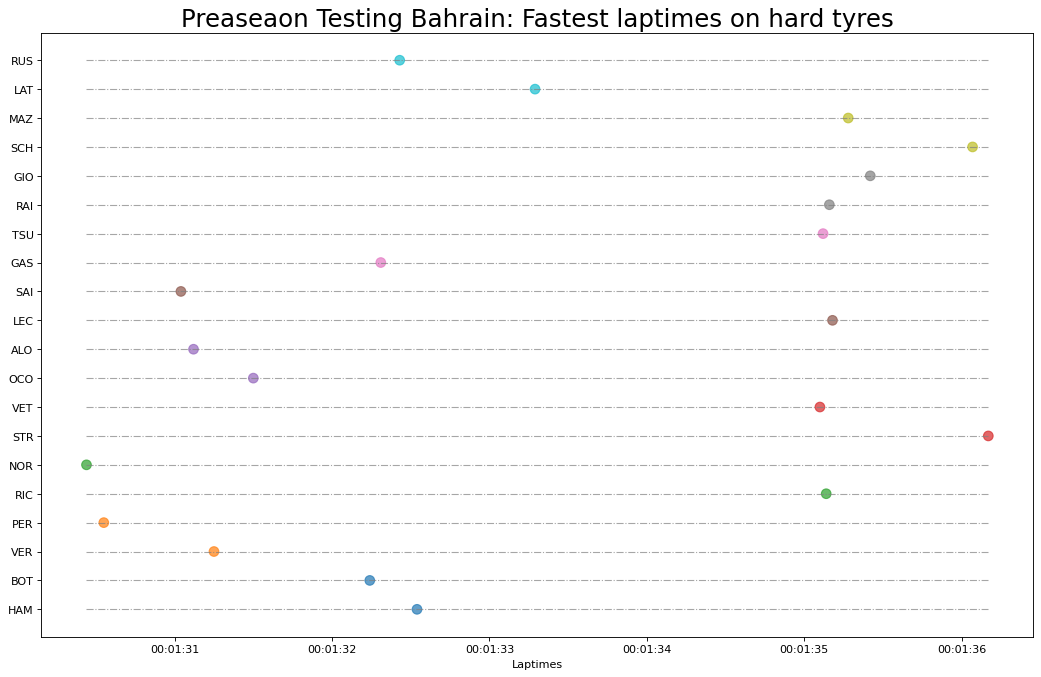

In [185]:
b = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for n in range(len(a)):
    if (d1H[n] != 'None'):
        b[n]=pd.to_datetime(d1H[n], infer_datetime_format=True).strftime('%H:%M:%S.%f')[:-6]
    if (d2H[n] != 'None' and d1H[n]>d2H[n]):
        b[n] = pd.to_datetime(d2H[n],  infer_datetime_format=True).strftime('%H:%M:%S.%f')[:-6] 
    if (d3H[n] != 'None' and (d2H[n] > d3H[n] or d1H[n] > d3H[n]) ):
        b[n] = pd.to_datetime(d3H[n],  infer_datetime_format=True).strftime('%H:%M:%S.%f')[:-6] 
    
for i in range(len(b)):
    str = b[i]
    b[i] = pd.to_datetime(str[:-4] + '.' + str[-3:-1], format = '%M:%S.%f')

color_indicies= [0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9]
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=a, xmin=b[5], xmax=b[6], color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=a, x=b, s=75, c=color_indicies,cmap='tab10', alpha=0.7)
ax.set_title('Preaseaon Testing Bahrain: Fastest laptimes on hard tyres', fontdict={'size':22})
ax.set_xlabel('Laptimes')
plt.show()